In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')



In [3]:
image = cv.imread('/kaggle/input/rvf10k/rvf10k/train/fake/002KDWZBHU.jpg')

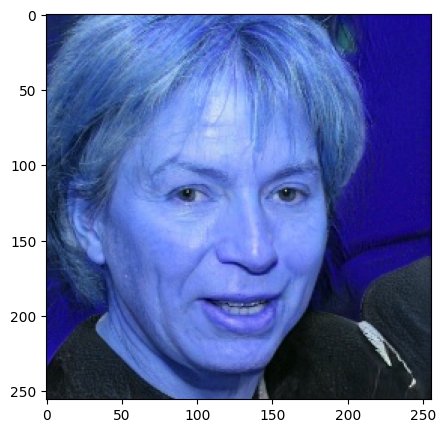

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(image)
# plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

In [5]:
image.shape

(256, 256, 3)

In [6]:
print(image.min())
print(image.max())

0
255


In [7]:
train_fake = "/kaggle/input/rvf10k/rvf10k/train/fake"
train_real = "/kaggle/input/rvf10k/rvf10k/train/real"
test_fake = "/kaggle/input/rvf10k/rvf10k/valid/fake"
test_real = "/kaggle/input/rvf10k/rvf10k/valid/real"

In [8]:
# from collections import Counter
# def count_shape(image_folder):
#     shapes_list = []
#     for each_image in os.listdir(image_folder):
#         img = cv.imread(os.path.join(image_folder, each_image))
#         if img is not None:
#             shapes_list.append(img.shape)
#     shape_counts = Counter(shapes_list)
    
#     return shape_counts

# print(count_shape(train_fake))
# print(count_shape(train_real))
# print(count_shape(test_fake))
# print(count_shape(test_real))

In [9]:
def colorConversion(image_folder):
    converted_images = []
    for each_image in sorted(os.listdir(image_folder)):
        img = cv.imread(os.path.join(image_folder, each_image))
        converted_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        if img is not None:
            converted_images.append(converted_img)
    return converted_images

In [10]:
converted_train_fake = colorConversion(train_fake)
converted_train_real = colorConversion(train_real)
converted_test_fake = colorConversion(test_fake)
converted_test_real = colorConversion(test_real)

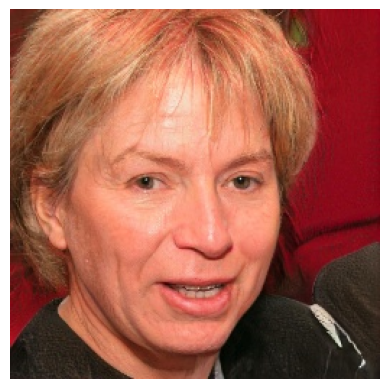

In [11]:
plt.imshow(converted_train_fake[0])
plt.axis('off')
plt.show()


In [12]:
print(converted_train_fake[0])

[[[114  35  30]
  [111  34  28]
  [105  32  25]
  ...
  [147   6  23]
  [151   5  26]
  [157  11  32]]

 [[111  36  30]
  [109  36  29]
  [104  34  26]
  ...
  [148   7  24]
  [148   5  25]
  [152   6  27]]

 [[105  37  28]
  [104  37  28]
  [101  37  27]
  ...
  [148   7  24]
  [148   5  25]
  [147   1  22]]

 ...

 [[ 36  31  27]
  [ 41  36  32]
  [ 40  35  31]
  ...
  [ 35  30  24]
  [ 32  27  23]
  [ 29  24  20]]

 [[ 38  30  27]
  [ 36  28  25]
  [ 38  30  27]
  ...
  [ 36  31  27]
  [ 33  28  25]
  [ 28  23  20]]

 [[ 32  24  21]
  [ 39  31  28]
  [ 40  32  29]
  ...
  [ 37  32  28]
  [ 32  27  24]
  [ 26  21  18]]]


In [13]:
normalized_train_fake = [img / 255.0 for img in converted_train_fake]
normalized_train_real = [img / 255.0 for img in converted_train_real]
normalized_test_fake = [img / 255.0 for img in converted_test_fake]
normalized_test_real = [img / 255.0 for img in converted_test_real]

In [14]:
normalized_train_fake[0]

array([[[0.44705882, 0.1372549 , 0.11764706],
        [0.43529412, 0.13333333, 0.10980392],
        [0.41176471, 0.1254902 , 0.09803922],
        ...,
        [0.57647059, 0.02352941, 0.09019608],
        [0.59215686, 0.01960784, 0.10196078],
        [0.61568627, 0.04313725, 0.1254902 ]],

       [[0.43529412, 0.14117647, 0.11764706],
        [0.42745098, 0.14117647, 0.11372549],
        [0.40784314, 0.13333333, 0.10196078],
        ...,
        [0.58039216, 0.02745098, 0.09411765],
        [0.58039216, 0.01960784, 0.09803922],
        [0.59607843, 0.02352941, 0.10588235]],

       [[0.41176471, 0.14509804, 0.10980392],
        [0.40784314, 0.14509804, 0.10980392],
        [0.39607843, 0.14509804, 0.10588235],
        ...,
        [0.58039216, 0.02745098, 0.09411765],
        [0.58039216, 0.01960784, 0.09803922],
        [0.57647059, 0.00392157, 0.08627451]],

       ...,

       [[0.14117647, 0.12156863, 0.10588235],
        [0.16078431, 0.14117647, 0.1254902 ],
        [0.15686275, 0

In [15]:
train_fake_labels = [0] * len(normalized_train_fake)
train_real_labels = [1] * len(normalized_train_real)
test_fake_labels = [0] * len(normalized_test_fake)
test_real_labels = [1] * len(normalized_test_real)

In [16]:
X_train = normalized_train_fake + normalized_train_real
y_train = train_fake_labels + train_real_labels

X_test = normalized_test_fake + normalized_test_real
y_test = test_fake_labels + test_real_labels

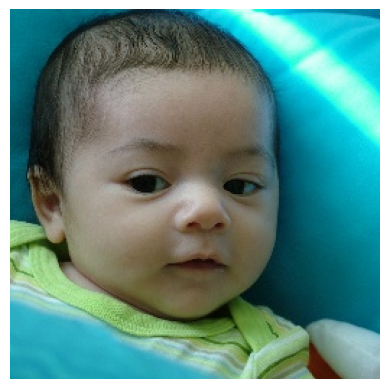

In [17]:
plt.imshow(X_train[3500])
plt.axis('off')
plt.show()


In [18]:
import random
random.seed(42)

train_data = list(zip(X_train, y_train))
random.shuffle(train_data)
X_train, y_train = zip(*train_data)

test_data = list(zip(X_test, y_test))
random.shuffle(test_data)
X_test, y_test = zip(*test_data)


In [19]:
def resize_images(image_list, size=(128, 128)):
    resized_images = []
    for img in image_list:
        resized_img = cv.resize(img, size)
        resized_images.append(resized_img)
    return resized_images

In [20]:
X_train = resize_images(X_train, size=(128, 128))
X_test = resize_images(X_test, size=(128, 128))

In [21]:
print(type(X_train))

<class 'list'>


In [22]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [23]:
print(type(X_train))

<class 'numpy.ndarray'>


In [24]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization()) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  


2025-06-16 18:23:25.639476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750098205.833786      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750098205.889020      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1750098219.157974      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [26]:
history = model.fit(X_train, y_train, 
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test, y_test)
                    )


Epoch 1/15


I0000 00:00:1750098230.007799      98 service.cc:148] XLA service 0x7987480129d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750098230.008489      98 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750098230.485886      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


 15/219 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5618 - loss: 2.8259

I0000 00:00:1750098234.072797      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.5714 - loss: 1.4657 - val_accuracy: 0.5563 - val_loss: 0.9560
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6404 - loss: 0.6322 - val_accuracy: 0.6083 - val_loss: 0.6447
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7000 - loss: 0.5686 - val_accuracy: 0.7040 - val_loss: 0.5780
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7181 - loss: 0.5292 - val_accuracy: 0.5440 - val_loss: 0.9317
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7629 - loss: 0.4851 - val_accuracy: 0.7310 - val_loss: 0.5484
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7842 - loss: 0.4579 - val_accuracy: 0.7643 - val_loss: 0.5060
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8109 - loss: 0.4173 - val_accuracy: 0.7977 - val_loss: 0.4448
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8285 - loss: 0.3832 - val_accuracy: 0.73

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8327 - loss: 0.4831
Test Accuracy: 83.43%


In [28]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32") 


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

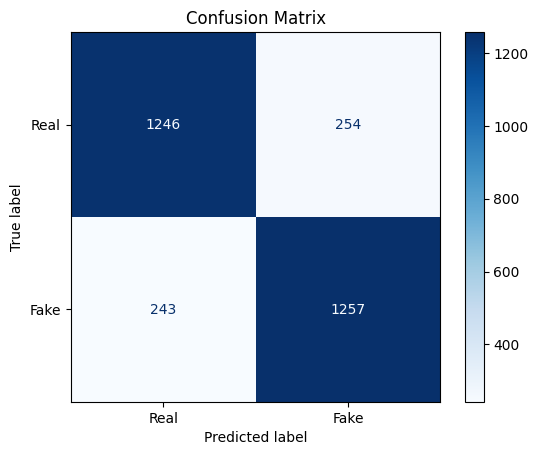

In [30]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [31]:
import os
print(os.listdir())

['.virtual_documents']


In [32]:
model.save("deepfake_model.keras")

In [33]:
from tensorflow.keras.models import load_model
model = load_model("deepfake_model.keras")

In [34]:
import tensorflow as tf
print(tf.__version__)

2.18.0
